In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
import os

In [3]:
labels = [] # empty list for storing labels

# defining a function to fetch the labels from the given directory
def fetch_label(path):
    for i in os.listdir(path): # this loop will iterate over the directory
        yoga_pose_name = i.split('-')[0]  # split the directory name at the hyphen and take the first part
        labels.append(yoga_pose_name) # append the yoga pose name to the list

fetch_label("/content/drive/MyDrive/yogapose2")

In [4]:
labels

['Pigeon',
 'Triangle',
 'Standing',
 'Child',
 'Tree',
 'Warrior',
 'Downward',
 'Cobra',
 'Bridge']

In [5]:
import os

path = "/content/drive/MyDrive/yogapose2"
Total_sample = 0

for i in os.listdir(path):
    inner_path = os.path.join(path, i)
    for j in os.listdir(inner_path):
        print(f'Length of :{j}= {len(os.listdir(os.path.join(inner_path, j)))}')
        Total_sample += len(os.listdir(os.path.join(inner_path, j)))

print(f'Total Samples: {Total_sample}')


Length of :Pigeon-Pose= 210
Length of :Triangle-Pose= 274
Length of :Standing-Mountain-Pose= 198
Length of :Child-Pose= 261
Length of :Tree-Pose= 334
Length of :Warrior-Pose= 209
Length of :Downward-Dog-Pose= 226
Length of :Cobra-Pose= 197
Length of :Bridge-Pose= 268
Total Samples: 2177


In [6]:
from tqdm import tqdm
from skimage.io import imread
from skimage import transform
import numpy as np
import os

img_size = 224     # 170x170
X = []
Y = []
i = 0
path = "/content/drive/MyDrive/yogapose2"  # replace with your actual path

for idx, img in enumerate(os.listdir(path)):
    inner_path = os.path.join(path, img)
    for folder in os.listdir(inner_path):
        inner_inner_path = os.path.join(inner_path, folder)
        for img_name in tqdm(os.listdir(inner_inner_path)):
            try:
                if i < 300:
                    img_file = imread(os.path.join(inner_inner_path, img_name))
                    if img_file is not None:
                        img_file = transform.resize(img_file, (img_size, img_size, 3))
                        X.append(img_file)
                        Y.append(idx)
                else:
                    break
                i = i + 1
            except Exception as e:
                print(f"An error occurred: {e}")
        i = 0

X = np.asarray(X)
Y = np.asarray(Y)


 11%|█▏        | 31/274 [00:13<00:41,  5.82it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 12%|█▏        | 27/226 [00:09<00:54,  3.68it/s]/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
100%|██████████| 268/268 [00:27<00:00,  9.73it/s]


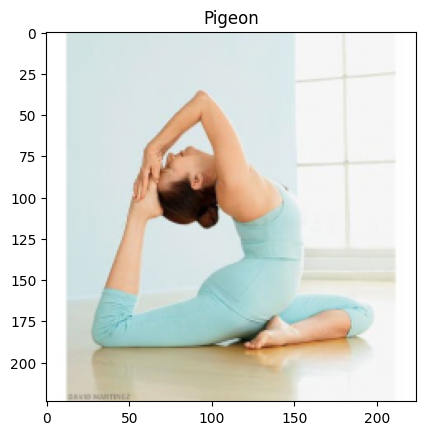

In [7]:
plt.imshow(X[201])
plt.title(labels[Y[201]])
plt.show()

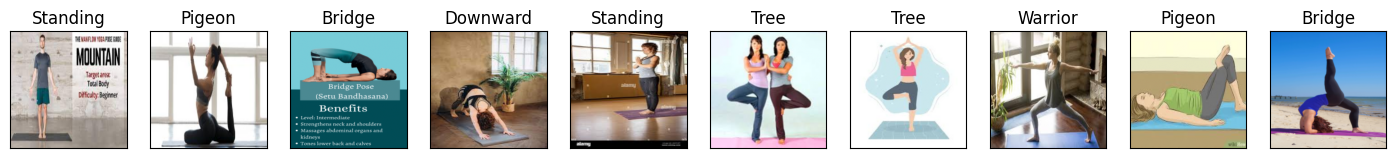

In [8]:
from random import randint
import matplotlib.pyplot as plt

n = 50  # how many digits we will display
plt.figure(figsize=(90,40))

for i in range(10,20):
    # display original
    rn = randint(0, len(X)-1)  # ensure rn is within the bounds of the array X
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(1714, 224, 224, 3),(1714,) Testing Data->((429, 224, 224, 3), (429,))


In [10]:
# OneHot-Encoding
from keras.utils import to_categorical

# Your code using to_categorical

Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

Y_train.shape,Y_test.shape

((1714, 9), (429, 9))

In [11]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dropout

model=Sequential()
model.add(Conv2D(16,(5,5),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(4,4),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(50,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(labels),activation='softmax'))  # Multi-class Classification Problem
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 32)        0

In [12]:
from time import time
tic=time()
epoch=30
#from tensorflow.keras.callbacks import EarlyStopping
#earlystop = EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

Epoch 1/30
43/43 [==============================] - 118s 3s/step - loss: 2.2112 - accuracy: 0.1408 - val_loss: 2.1903 - val_accuracy: 0.1341
Epoch 2/30
43/43 [==============================] - 111s 3s/step - loss: 2.1878 - accuracy: 0.1561 - val_loss: 2.1862 - val_accuracy: 0.1429
Epoch 3/30
43/43 [==============================] - 114s 3s/step - loss: 2.1079 - accuracy: 0.2079 - val_loss: 1.9878 - val_accuracy: 0.3149
Epoch 4/30
43/43 [==============================] - 117s 3s/step - loss: 1.8404 - accuracy: 0.3559 - val_loss: 1.7770 - val_accuracy: 0.4111
Epoch 5/30
43/43 [==============================] - 118s 3s/step - loss: 1.5635 - accuracy: 0.4457 - val_loss: 1.6394 - val_accuracy: 0.4373
Epoch 6/30
43/43 [==============================] - 124s 3s/step - loss: 1.2637 - accuracy: 0.5842 - val_loss: 1.5219 - val_accuracy: 0.4898
Epoch 7/30
43/43 [==============================] - 113s 3s/step - loss: 0.9615 - accuracy: 0.6783 - val_loss: 1.4214 - val_accuracy: 0.5714
Epoch 8/30
43

Text(0.5, 1.0, 'Loss evolution')

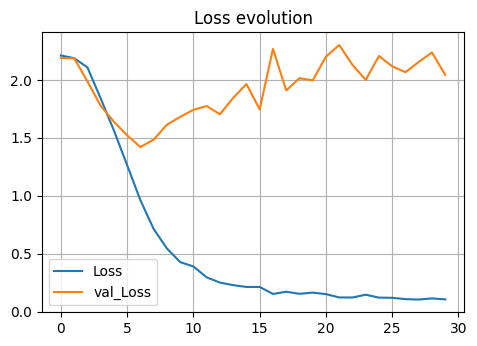

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

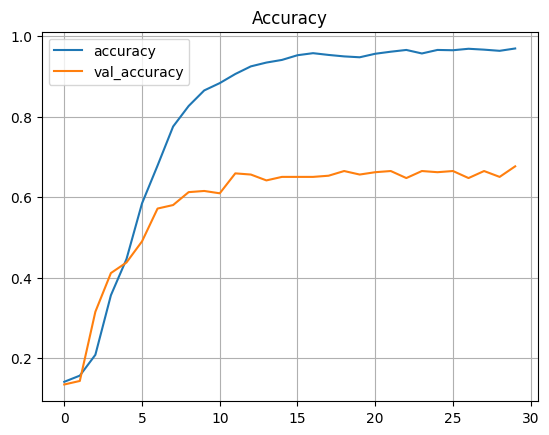

In [14]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [15]:
score=model.evaluate(X_test,Y_test,verbose=1)

14/14 [==============================] - 9s 642ms/step - loss: 2.6278 - accuracy: 0.6457


In [16]:
Y_test=np.argmax(Y_test,axis=1)

In [17]:
print(Y_test)

[8 3 8 5 6 1 1 6 7 1 8 6 7 4 8 6 1 1 5 8 4 7 7 2 6 1 8 3 6 5 3 3 3 5 3 0 0
 1 0 1 4 1 7 6 1 4 8 5 8 7 7 1 5 4 0 2 0 4 0 0 4 8 2 8 4 1 2 2 3 7 8 0 6 8
 1 7 4 6 4 3 4 8 5 3 8 1 7 2 7 7 3 2 3 8 2 1 4 3 2 5 3 5 6 3 6 2 7 6 0 4 3
 0 1 1 0 6 1 3 6 2 0 3 7 2 1 8 6 2 5 0 7 8 0 0 8 3 5 7 0 3 4 7 3 3 5 4 2 3
 6 4 2 0 6 8 0 2 2 8 3 0 1 5 3 6 5 1 4 4 4 7 1 5 6 2 4 1 1 4 0 0 0 6 8 4 2
 5 5 4 4 2 7 0 2 3 1 5 3 6 4 7 4 1 0 2 4 0 4 6 0 5 4 3 6 1 7 3 7 8 6 4 2 4
 1 7 2 5 1 5 6 5 8 0 4 3 6 6 7 7 3 8 0 5 0 8 6 1 8 4 5 8 0 4 4 6 6 1 8 5 1
 8 0 5 6 3 7 4 7 5 1 6 8 3 1 8 4 7 7 4 3 8 4 3 8 5 8 4 2 3 6 1 4 0 0 7 5 7
 5 8 1 2 8 6 3 0 6 8 3 2 8 5 4 1 0 4 5 7 8 0 1 3 0 0 1 6 5 7 6 4 2 3 3 8 1
 1 4 7 2 3 1 4 4 8 3 5 2 3 1 4 6 1 5 3 4 7 7 2 8 7 8 4 2 4 1 6 6 4 4 2 0 2
 3 6 1 4 8 4 3 8 6 0 2 8 4 8 7 1 2 3 1 3 2 3 6 3 2 2 4 5 5 8 8 6 5 3 1 1 8
 1 1 0 3 1 5 4 2 5 0 5 8 7 1 1 8 4 8 4 8 6 5]


In [18]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

14/14 [==============================] - 9s 661ms/step
[8 1 5 5 7 1 1 6 0 3 5 6 7 4 8 1 1 1 6 8 4 3 8 2 6 1 8 7 1 5 0 3 8 5 5 7 0
 0 4 1 1 1 5 7 0 4 8 5 8 2 7 1 1 4 0 2 2 4 0 0 4 8 2 8 1 8 8 2 3 8 1 0 8 8
 5 7 4 6 4 7 4 8 5 3 8 7 7 2 7 5 3 4 3 8 2 1 2 8 2 5 5 5 6 7 6 2 7 6 7 2 3
 3 1 1 5 3 4 0 4 2 2 3 7 2 1 6 6 2 1 0 7 3 0 7 8 1 5 7 3 4 1 7 3 3 5 4 2 3
 6 4 2 0 7 8 0 2 5 8 8 6 1 0 3 6 2 1 4 7 2 0 1 5 1 0 4 1 1 4 3 5 6 2 8 2 2
 5 8 4 4 2 7 4 2 4 4 5 6 6 4 2 0 1 0 2 4 0 4 6 3 5 4 3 3 1 7 5 7 8 6 4 2 1
 1 7 7 5 8 4 1 5 3 0 2 4 6 6 5 7 3 8 0 5 4 8 6 1 1 4 4 8 0 4 5 6 6 4 0 6 2
 8 0 5 6 3 7 4 4 1 0 6 8 3 1 8 4 7 4 4 2 8 4 3 8 4 6 4 2 3 6 2 4 0 0 0 5 7
 5 3 6 2 3 4 3 6 6 8 3 2 8 5 4 1 0 4 5 4 8 0 2 4 0 0 1 7 5 7 6 4 2 4 3 8 1
 1 0 0 2 4 1 6 4 8 3 5 2 4 1 4 6 1 5 1 5 7 7 2 8 7 8 4 2 4 1 2 6 4 4 2 0 2
 3 7 1 0 6 4 8 8 1 8 4 6 4 3 7 1 5 3 1 4 2 4 6 3 2 2 8 5 5 3 7 6 5 3 1 1 7
 5 3 3 3 1 1 4 2 4 8 5 8 1 1 3 8 4 8 2 8 6 5]


In [19]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,y_pred))

[[22  0  2  5  3  2  3  3  2]
 [ 3 37  3  3  3  2  1  1  2]
 [ 1  0 33  0  2  2  0  1  1]
 [ 2  3  1 26  9  3  1  3  4]
 [ 3  4  6  0 42  2  1  1  1]
 [ 1  4  1  0  4 29  2  0  1]
 [ 0  5  2  2  2  0 28  5  1]
 [ 4  1  2  1  3  3  0 23  2]
 [ 1  2  0  6  0  2  4  2 37]]


In [20]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.52      0.56        42
           1       0.66      0.67      0.67        55
           2       0.66      0.82      0.73        40
           3       0.60      0.50      0.55        52
           4       0.62      0.70      0.66        60
           5       0.64      0.69      0.67        42
           6       0.70      0.62      0.66        45
           7       0.59      0.59      0.59        39
           8       0.73      0.69      0.70        54

    accuracy                           0.65       429
   macro avg       0.64      0.65      0.64       429
weighted avg       0.65      0.65      0.64       429



14/14 [==============================] - 15s 1s/step


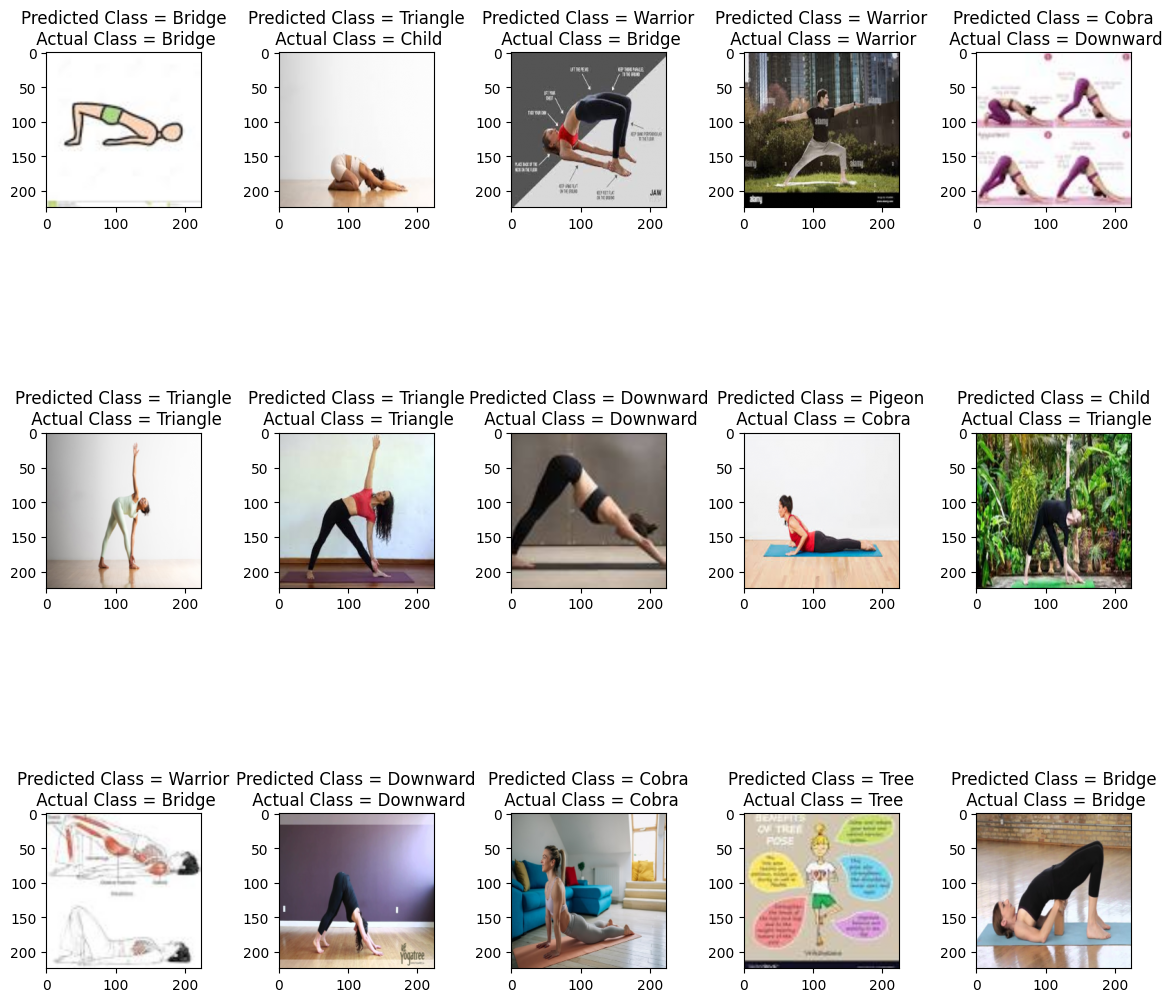

In [21]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 3
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)